# Attribute Information→

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

12 - quality (score between 0 and 10)


# Loading the Library

In [1]:
from pyforest import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the Datset

In [2]:
df=pd.read_csv("C:/Users/HP/Desktop/RedWine.csv")

<IPython.core.display.Javascript object>

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.shape

(1599, 12)

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#checking the data types of each columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Observation→ we can see from the Above that we ahave 2 dtypes of datypes i al caloumns When All columns Are Float ,othehand Quality columns is int type



In [7]:
#checking the Info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#Lets Checking the Null Values
df.isnull().values.any()

False

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<IPython.core.display.Javascript object>

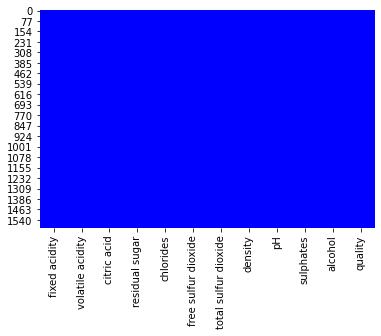

In [10]:
#lets plot a heamap to chek the Nan values
sns.heatmap(df.isnull(),cbar=False,cmap='winter')

In [11]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [12]:
df.iplot()

In [13]:
#checking the Target Variable
df.quality.value_counts().iplot()

In [14]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [15]:
df.quality.value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

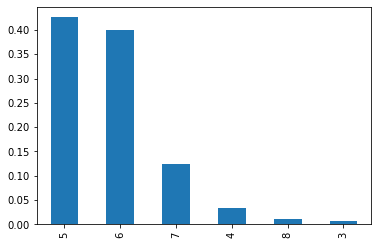

In [16]:
df.quality.value_counts(normalize=True).plot(kind='bar')

In [17]:
#lets convert all qualities into bad and Good * respect to problem Statment
#Binary Classification
df['quality']=df['quality'].replace({7:1, 8:1,3: 0, 4:0, 5: 0,6:0})

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

0    0.86429
1    0.13571
Name: quality, dtype: float64


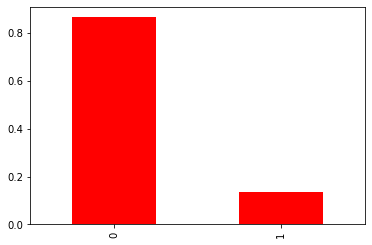

In [18]:
df.quality.value_counts(normalize=True).plot(kind='bar',color='r')
print(df.quality.value_counts(normalize=True))

In [19]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# DataSet Balancing

In [20]:
count_class_0, count_class_1 = df.quality.value_counts()
df_class_0 = df[df['quality'] == 0]
df_class_1 = df[df['quality'] == 1]
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.quality.value_counts())

<IPython.core.display.Javascript object>

Random over-sampling:
1    1382
0    1382
Name: quality, dtype: int64


In [21]:
df=df_test_over.copy()

1    0.5
0    0.5
Name: quality, dtype: float64


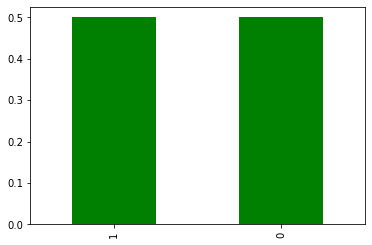

In [22]:
df.quality.value_counts(normalize=True).plot(kind='bar',color='g')
print(df.quality.value_counts(normalize=True))
df.quality.value_counts().iplot()

In [23]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    2764.000000       2764.000000  2764.000000     2764.000000   
mean        8.552750          0.473797     0.317200        2.606585   
std         1.888557          0.174333     0.202169        1.401266   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.200000          0.330000     0.130000        1.900000   
50%         8.200000          0.440000     0.330000        2.200000   
75%         9.800000          0.590000     0.470000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  2764.000000          2764.000000           2764.000000  2764.000000   
mean      0.082621            15.247829             42.456946     0.996441   
std       0.040435            10.486289             34.264979     0.002087   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.066000             7.000000             19.000000     0.995140   
50%       0.077000            12.000000             32.000000     0.996405   
75%       0.089000            20.000000             54.000000     0.997600   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol     quality  
count  2764.000000  2764.000000  2764.000000  2764.00000  
mean      3.299993     0.693263    10.881639     0.50000  
std       0.153278     0.160552     1.175818     0.50009  
min       2.740000     0.330000     8.400000     0.00000  
25%       3.200000     0.580000     9.900000     0.00000  
50%       3.300000     0.670000    10.800000     0.50000  
75%       3.390000     0.780000    11.800000     1.00000  
max       4.010000     2.000000    14.900000     1.00000

In [24]:
from scipy.stats import kurtosis
#lets define a function to see all kind of statistic data,nan values and IQR also
def stats(df):
    for i in df.columns:#getting All the columns in for Loop
        if df[i].dtypes!='object':# checking the columns Dtypes if it's not in objective then it will go forward→
            k=df[i]#declaring the variable
            cvar=k.mean()/k.std()#Coefficient of variation (CV)
            standard=k.std()#standard deviation
            krts=kurtosis(k)#Kurtosis
            #https://corporatefinanceinstitute.com/resources/knowledge/other/kurtosis/#:~:text=Kurtosis%20is%20a%20statistical%20measure,given%20distribution%20contain%20extreme%20values.
            m=k.mean()#mean
            mad=k.mad()#Median Absolute Deviation (MAD)
            skew=k.skew()#skewness
            variance=k.var()#variance
            Range=k.max()-k.min()#Range
            #Iqr
            Q1 = k.quantile(0.25)
            Q3 = k.quantile(0.75)
            IQR = Q3 - Q1
            des=df[i].describe()
            #making a Dtaa frame with above Data
            st=pd.DataFrame({"standard deviation":[standard],"Coefficient of variation":[cvar],
                             "Kurtosis":[krts],"mean":[m],"Median Absolute Deviation":[mad],
                             "skewness":[skew],"Variance":[variance],"Range":[Range],"IQR":[IQR]})
            print("column Name→→",i)
            print("Dtype=",df[i].dtype)
            print("\n")
            if df[i].skew()>0.55:
                print("This column Have Positive skewd Data")
            if df[i].skew()<-0.55:
                    print("This column Have Negetive skewd Data")
            print("\n")
            print(st)
            sns.set_style("whitegrid")
            sns.distplot(df[i], kde=True)
            plt.plot(skew,color='red',label=skew)
            plt.legend()
            st.plot(kind='bar')
            plt.show()
            print("column Describe")
            print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
            print(des)
            des.plot(kind='bar',color='red')
            plt.xticks(rotation=75)
            plt.show()
            print("\n")
            print("\n")
            print("\n")
        else:
            v=df[i].value_counts()
            print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
            print("Value Counts of column")
            print("\n")
            print(v)
            sns.countplot(x=df[i],data=df)
            print("columns Name→→",i)
            print("Dtype =",df[i].dtype)
            plt.xticks(rotation=75)
            plt.show()
            print("\n")
            print("\n")
            print("\n")
        nan=df[i].isnull().sum()    
        Nan=nan/len(df[i])
        if Nan ==0.0:
            print("No Nan Values Are Present")
            print("\n")
            print("\n")
        else:
            print("NaN Value % → →",Nan)
            print(nan,"    Nan values are present")
            print("\n")
            print("\n")
        print("►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►")

<IPython.core.display.Javascript object>

column Name→→ fixed acidity
Dtype= float64


This column Have Positive skewd Data


   standard deviation  Coefficient of variation  Kurtosis     mean  \
0            1.888557                  4.528722  0.739857  8.55275   

   Median Absolute Deviation  skewness  Variance  Range  IQR  
0                   1.493613  0.764984  3.566648   11.3  2.6  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

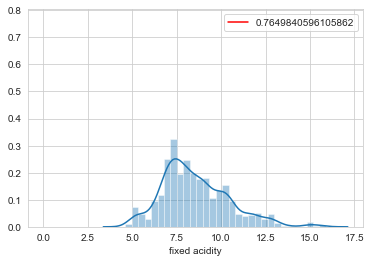

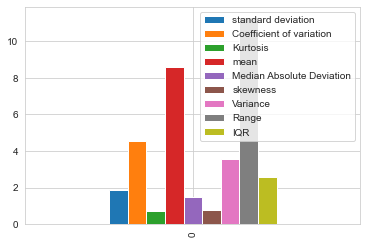

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        8.552750
std         1.888557
min         4.600000
25%         7.200000
50%         8.200000
75%         9.800000
max        15.900000
Name: fixed acidity, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

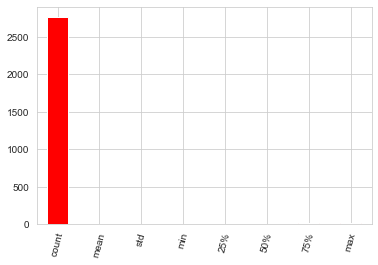







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ volatile acidity
Dtype= float64


This column Have Positive skewd Data


   standard deviation  Coefficient of variation  Kurtosis      mean  \
0            0.174333                  2.717763  1.169952  0.473797   

   Median Absolute Deviation  skewness  Variance  Range   IQR  
0                   0.141639  0.846807  0.030392   1.46  0.26  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

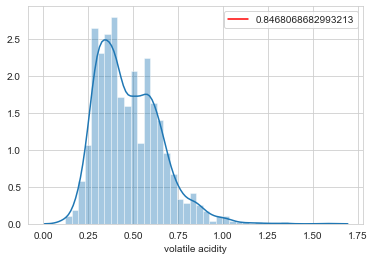

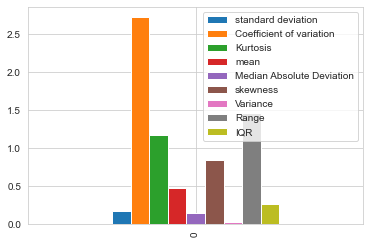

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        0.473797
std         0.174333
min         0.120000
25%         0.330000
50%         0.440000
75%         0.590000
max         1.580000
Name: volatile acidity, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

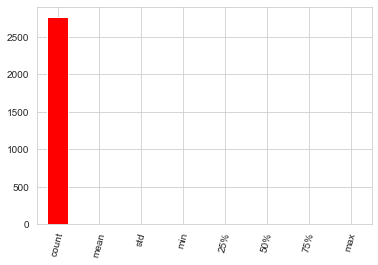







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ citric acid
Dtype= float64




   standard deviation  Coefficient of variation  Kurtosis    mean  \
0            0.202169                  1.568986 -0.883618  0.3172   

   Median Absolute Deviation  skewness  Variance  Range   IQR  
0                   0.169574  0.033455  0.040872    1.0  0.34  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

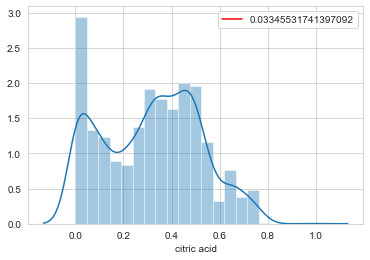

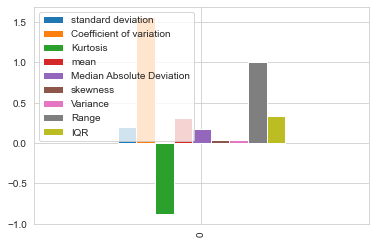

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        0.317200
std         0.202169
min         0.000000
25%         0.130000
50%         0.330000
75%         0.470000
max         1.000000
Name: citric acid, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

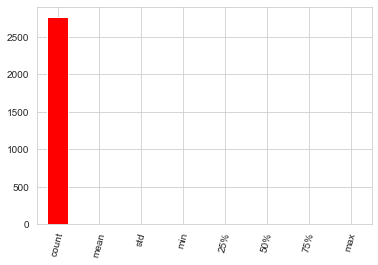







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ residual sugar
Dtype= float64


This column Have Positive skewd Data


   standard deviation  Coefficient of variation   Kurtosis      mean  \
0            1.401266                  1.860164  18.526398  2.606585   

   Median Absolute Deviation  skewness  Variance  Range  IQR  
0                   0.832008  3.572553  1.963547   14.6  0.7  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

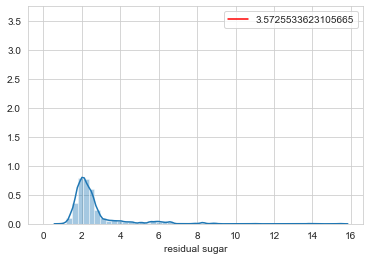

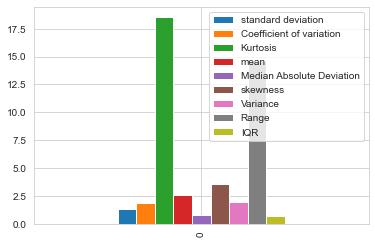

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        2.606585
std         1.401266
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

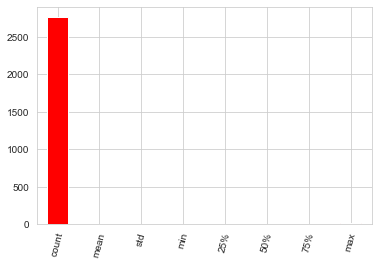







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ chlorides
Dtype= float64


This column Have Positive skewd Data


   standard deviation  Coefficient of variation   Kurtosis      mean  \
0            0.040435                  2.043323  50.460724  0.082621   

   Median Absolute Deviation  skewness  Variance  Range    IQR  
0                   0.019382  5.981735  0.001635  0.599  0.023  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

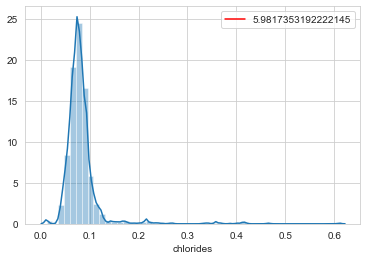

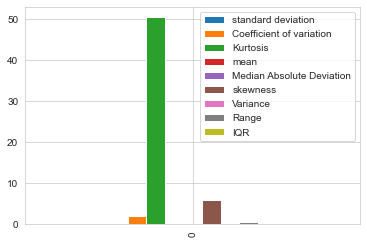

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        0.082621
std         0.040435
min         0.012000
25%         0.066000
50%         0.077000
75%         0.089000
max         0.611000
Name: chlorides, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

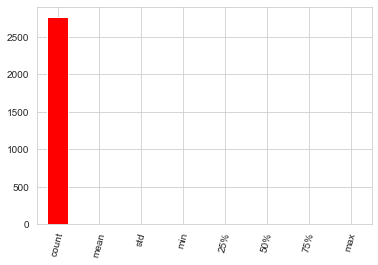







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ free sulfur dioxide
Dtype= float64


This column Have Positive skewd Data


   standard deviation  Coefficient of variation  Kurtosis       mean  \
0           10.486289                  1.454073  1.906916  15.247829   

   Median Absolute Deviation  skewness    Variance  Range   IQR  
0                   8.138977   1.33676  109.962265   71.0  13.0  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

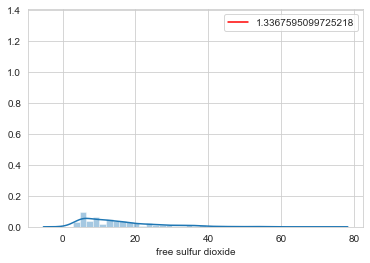

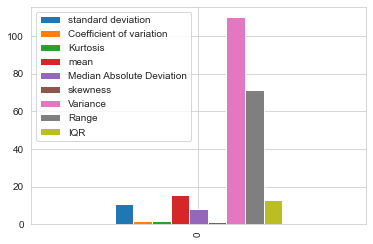

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean       15.247829
std        10.486289
min         1.000000
25%         7.000000
50%        12.000000
75%        20.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

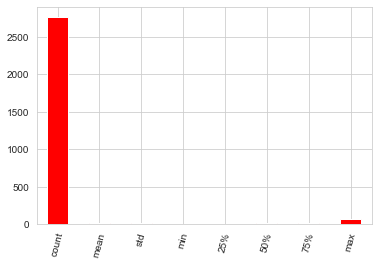







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ total sulfur dioxide
Dtype= float64


This column Have Positive skewd Data


   standard deviation  Coefficient of variation   Kurtosis       mean  \
0           34.264979                  1.239077  12.817732  42.456946   

   Median Absolute Deviation  skewness     Variance  Range   IQR  
0                  24.079533  2.690427  1174.088808  283.0  35.0  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

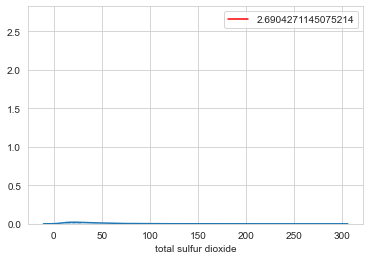

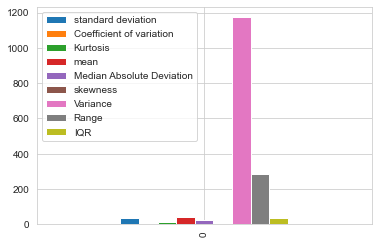

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean       42.456946
std        34.264979
min         6.000000
25%        19.000000
50%        32.000000
75%        54.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

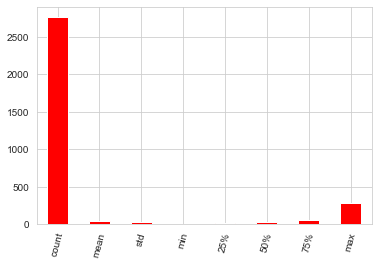







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ density
Dtype= float64




   standard deviation  Coefficient of variation  Kurtosis      mean  \
0            0.002087                 477.40196   0.38586  0.996441   

   Median Absolute Deviation  skewness  Variance    Range      IQR  
0                   0.001632   0.05022  0.000004  0.01362  0.00246  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

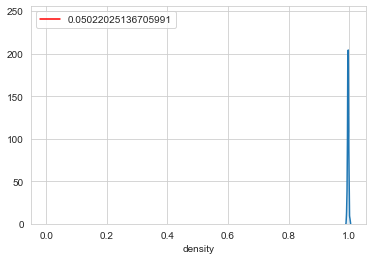

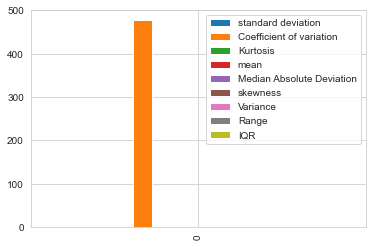

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        0.996441
std         0.002087
min         0.990070
25%         0.995140
50%         0.996405
75%         0.997600
max         1.003690
Name: density, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

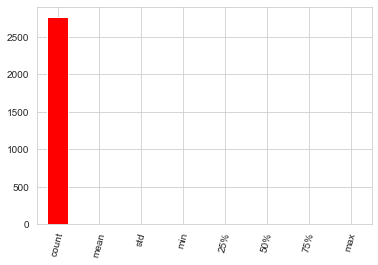







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ pH
Dtype= float64




   standard deviation  Coefficient of variation  Kurtosis      mean  \
0            0.153278                 21.529515  0.682218  3.299993   

   Median Absolute Deviation  skewness  Variance  Range   IQR  
0                   0.118821  0.278061  0.023494   1.27  0.19  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

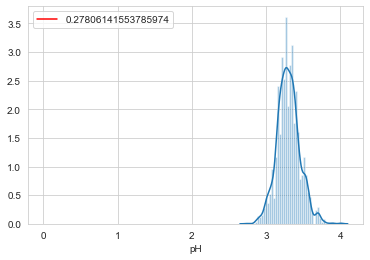

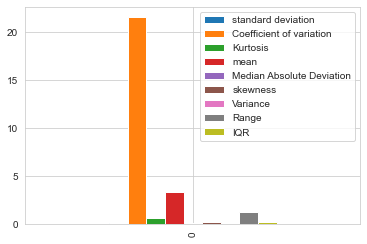

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        3.299993
std         0.153278
min         2.740000
25%         3.200000
50%         3.300000
75%         3.390000
max         4.010000
Name: pH, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

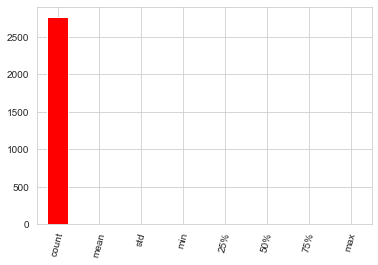







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ sulphates
Dtype= float64


This column Have Positive skewd Data


   standard deviation  Coefficient of variation  Kurtosis      mean  \
0            0.160552                  4.317997  7.564262  0.693263   

   Median Absolute Deviation  skewness  Variance  Range  IQR  
0                   0.121051   1.63302  0.025777   1.67  0.2  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

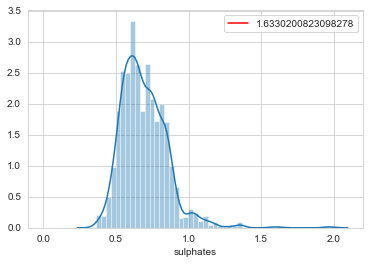

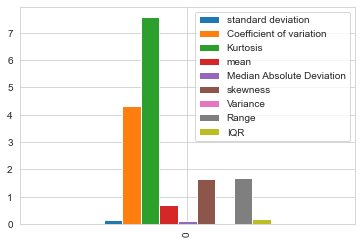

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        0.693263
std         0.160552
min         0.330000
25%         0.580000
50%         0.670000
75%         0.780000
max         2.000000
Name: sulphates, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

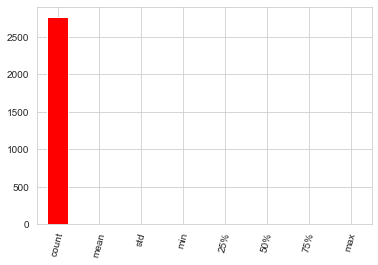







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ alcohol
Dtype= float64




   standard deviation  Coefficient of variation  Kurtosis       mean  \
0            1.175818                   9.25453 -0.632528  10.881639   

   Median Absolute Deviation  skewness  Variance  Range  IQR  
0                   0.982489  0.374561  1.382547    6.5  1.9  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

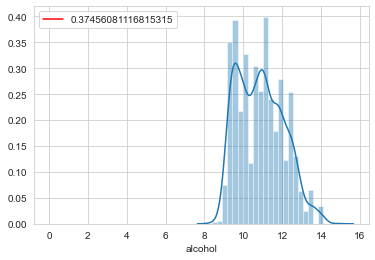

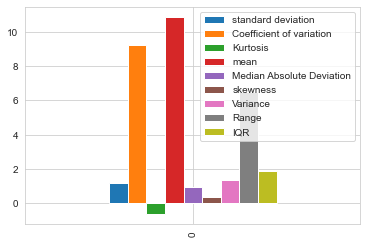

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean       10.881639
std         1.175818
min         8.400000
25%         9.900000
50%        10.800000
75%        11.800000
max        14.900000
Name: alcohol, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

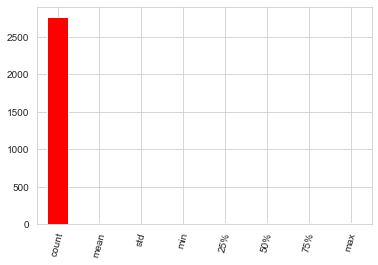







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ quality
Dtype= int64




   standard deviation  Coefficient of variation  Kurtosis  mean  \
0             0.50009                  0.999819      -2.0   0.5   

   Median Absolute Deviation  skewness  Variance  Range  IQR  
0                        0.5       0.0   0.25009      1  1.0  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

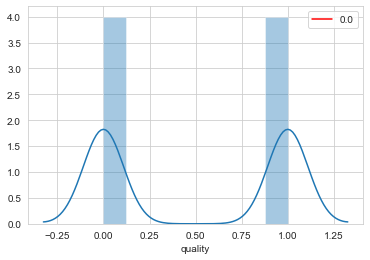

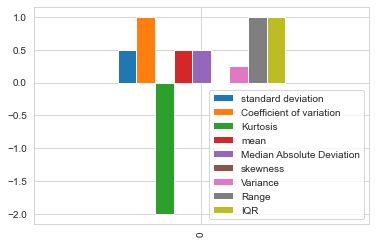

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.00000
mean        0.50000
std         0.50009
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: quality, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

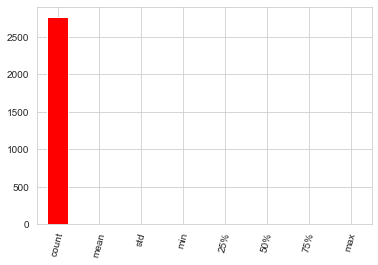







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


In [25]:
stats(df)

# correlation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

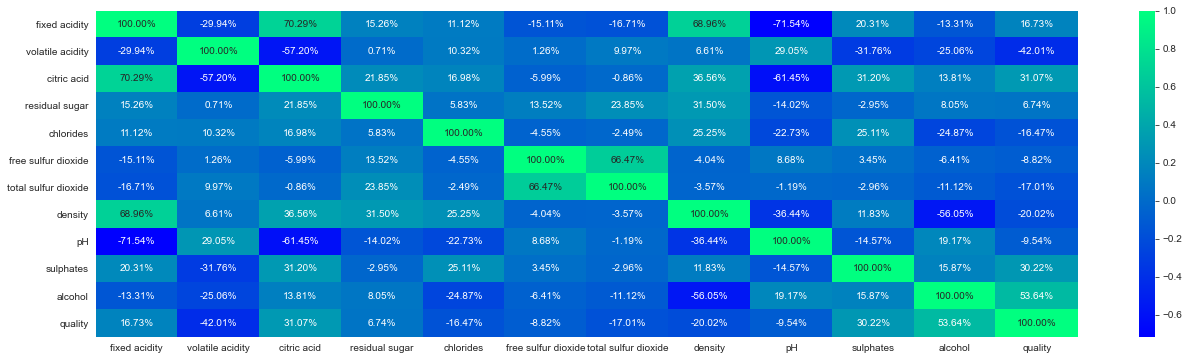

In [26]:
#check the correlation of columns with heatmap
plt.figure(figsize=[22,6])
sns.heatmap(df.corr(),fmt="0.2%",annot=True,cmap='winter')


# Outliers

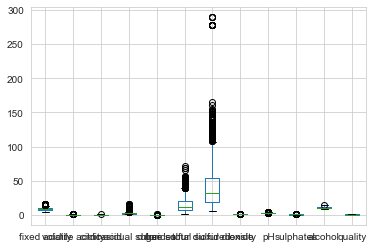

In [27]:
df.boxplot()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

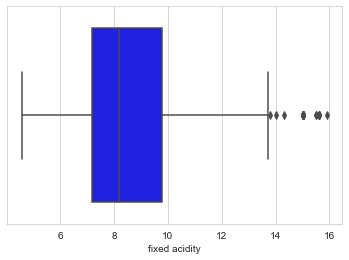

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

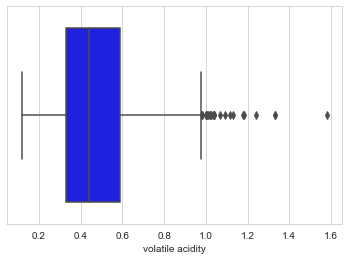

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

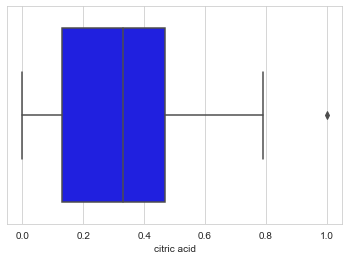

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

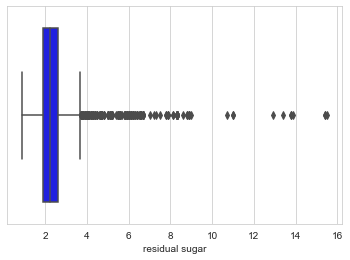

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

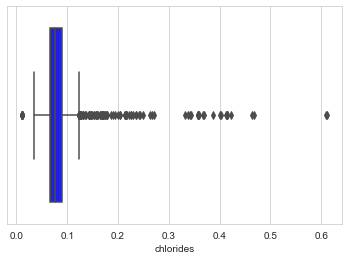

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

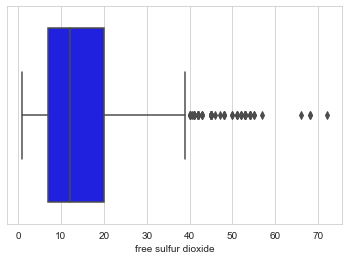

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

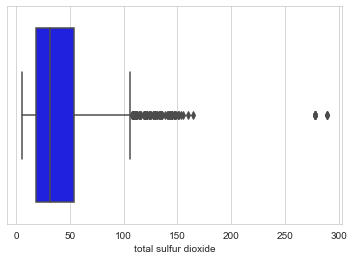

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

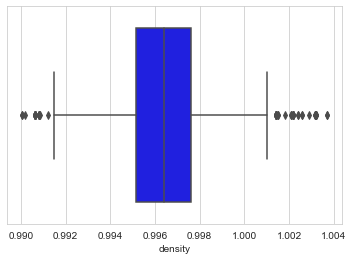

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

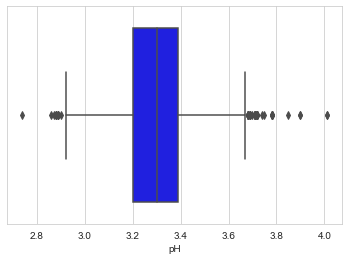

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

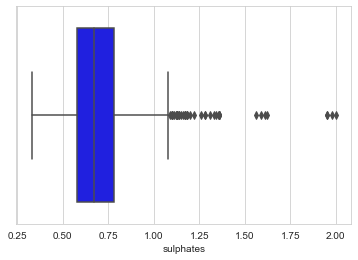

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

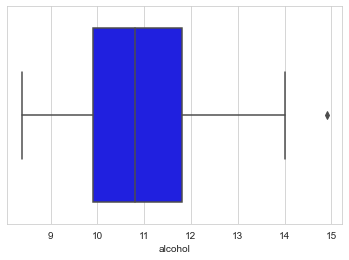

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

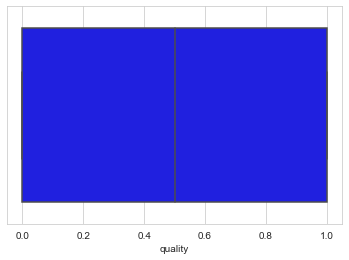

In [28]:
for i in df.columns:
    sns.boxplot(df[i],color='blue')
    plt.show()

# Univariant

In [29]:
#checking the mean of Estimated_Insects_Count cases with histplot
def mean(col):
    df[col].hist()
    m=df[col].mean()
    plt.axvline(m,linewidth=4,color='green',label=(col,' %0.2f'%m))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.title(col)
    plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

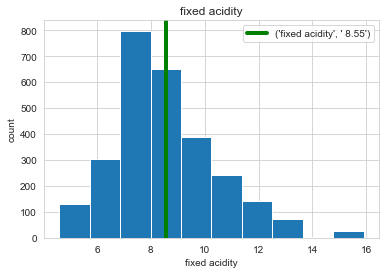

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

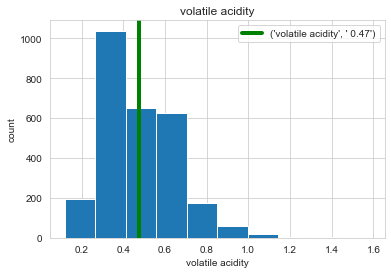

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

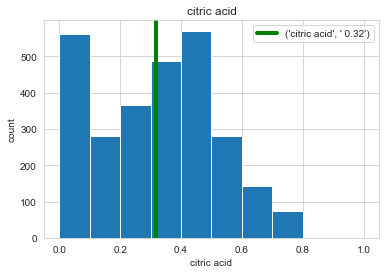

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

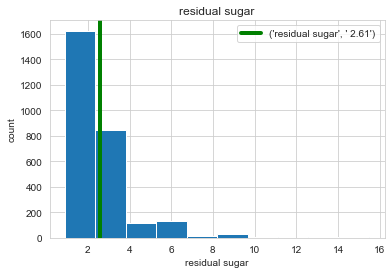

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

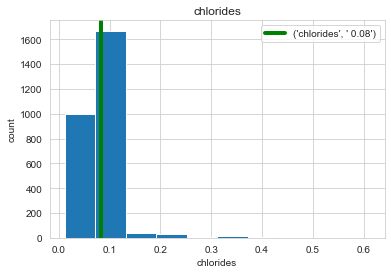

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

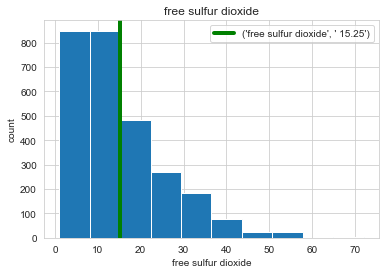

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

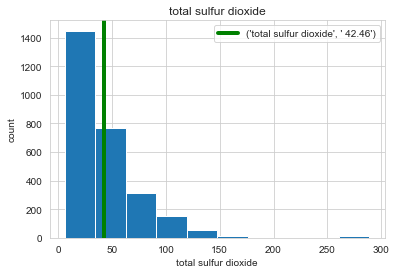

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

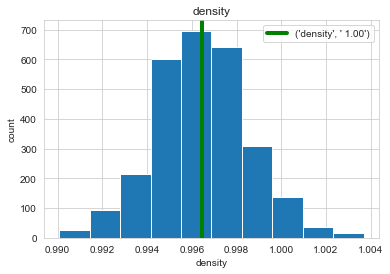

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

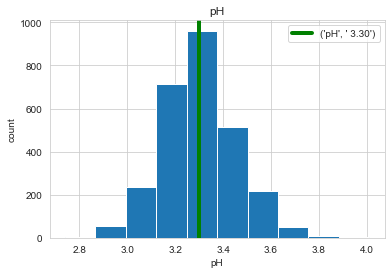

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

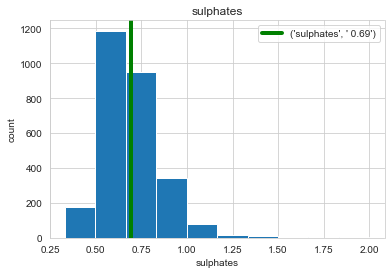

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

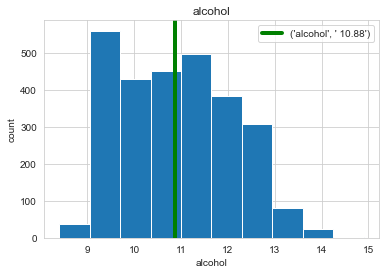

In [30]:
col=df.drop('quality',axis=1)
for i in col.columns:
    mean(i)
    plt.show()

# Baivariant  Analysis

# fixed acidity vs quality

In [31]:
px.scatter(df, x='fixed acidity', y="quality", animation_frame='fixed acidity', 
           animation_group='alcohol',
        color="quality", hover_name='fixed acidity',
           )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

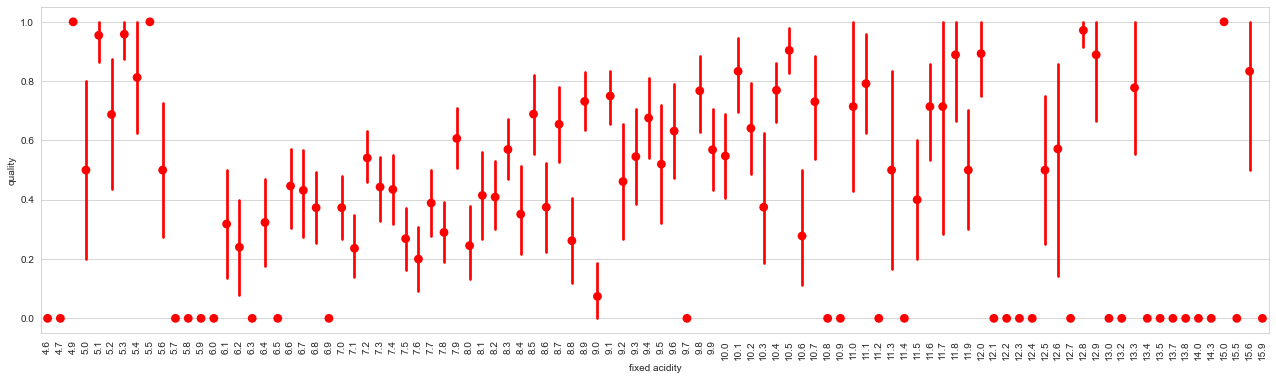

In [32]:
plt.figure(figsize=[22,6])
sns.pointplot(x="fixed acidity",y="quality",data=df,join=False,color='r')
plt.xticks(rotation = 90)
plt.show()


# volatile acidity vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1584x432 with 0 Axes>

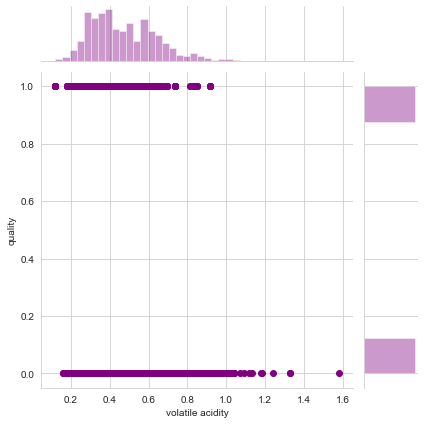

In [33]:
plt.figure(figsize=[22,6])
sns.jointplot(x='volatile acidity',y="quality",data=df,color='purple')
plt.xticks(rotation = 90)
plt.show()

# citric acid  vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

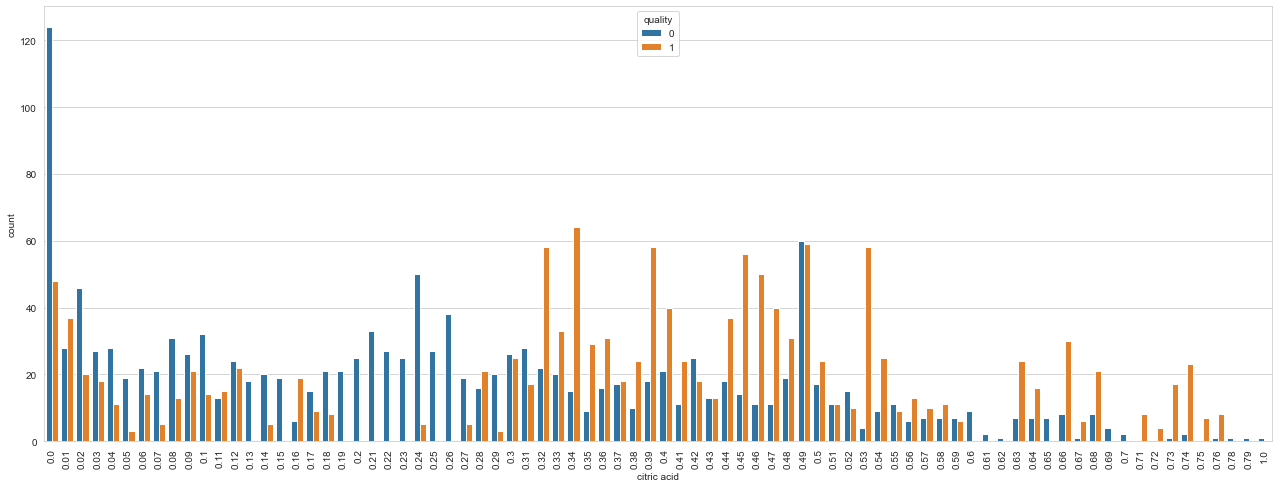

In [34]:
plt.figure(figsize=[22,8])
sns.countplot(x='citric acid',hue="quality",data=df)
plt.xticks(rotation = 90)
plt.show()

# residual sugar vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

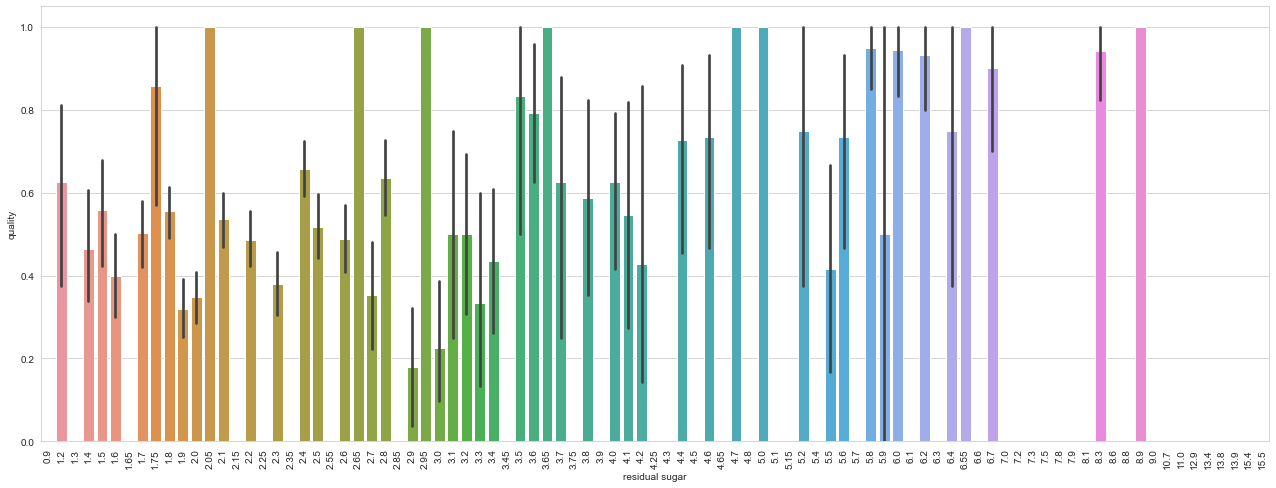

In [35]:
plt.figure(figsize=[22,8])
sns.barplot(data=df,x='residual sugar',y="quality")
plt.xticks(rotation = 90)
plt.show()

# chlorides vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

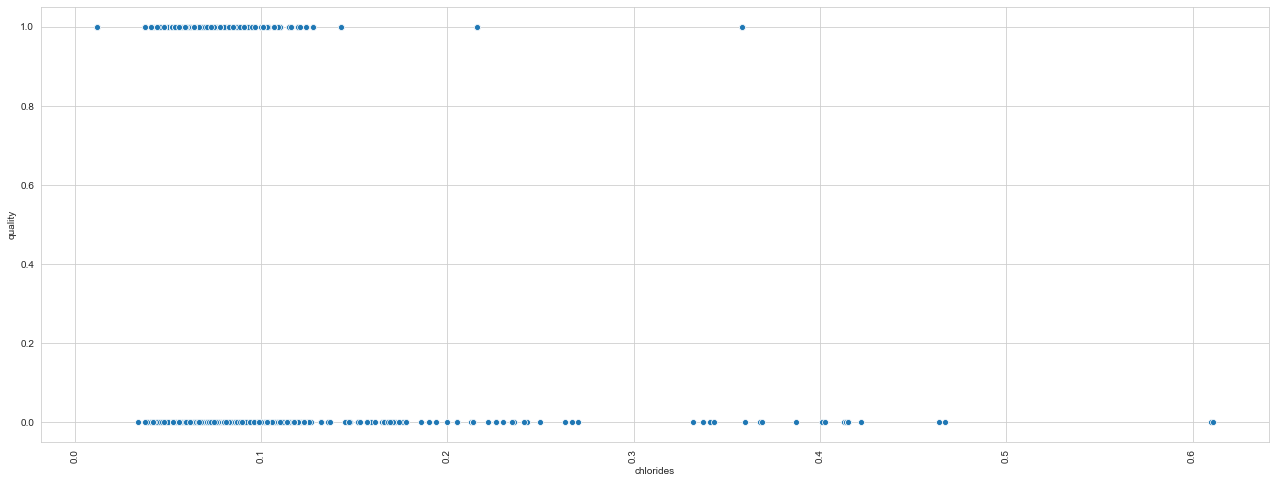

In [36]:
plt.figure(figsize=[22,8])
sns.scatterplot(data=df,x='chlorides',y="quality")
plt.xticks(rotation = 90)
plt.show()

# free sulfur dioxide vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

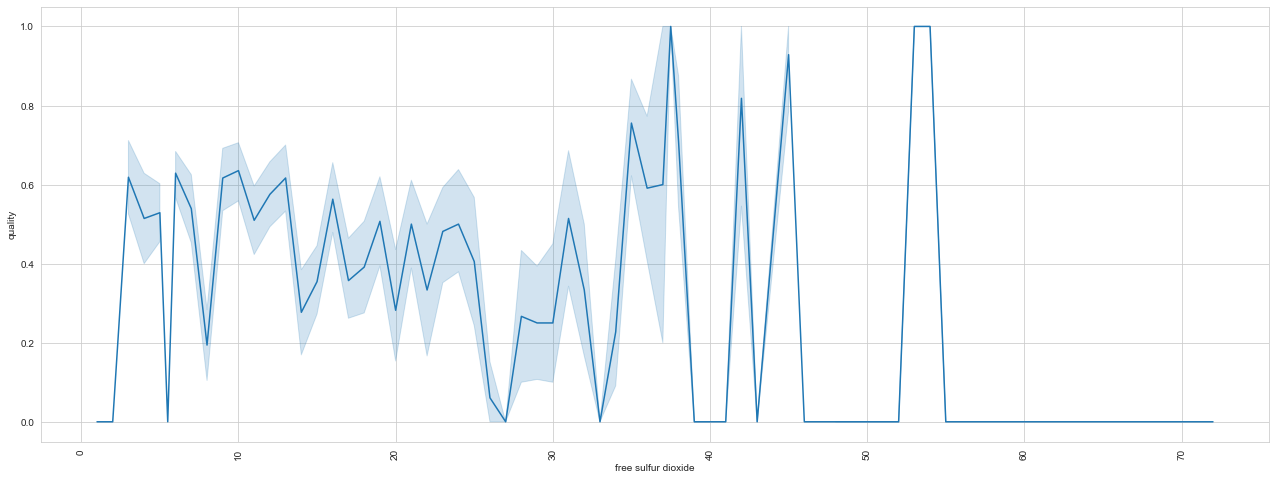

In [37]:

plt.figure(figsize=[22,8])
sns.lineplot(data=df,x='free sulfur dioxide',y="quality")
plt.xticks(rotation = 90)
plt.show()

# total sulfur dioxide vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

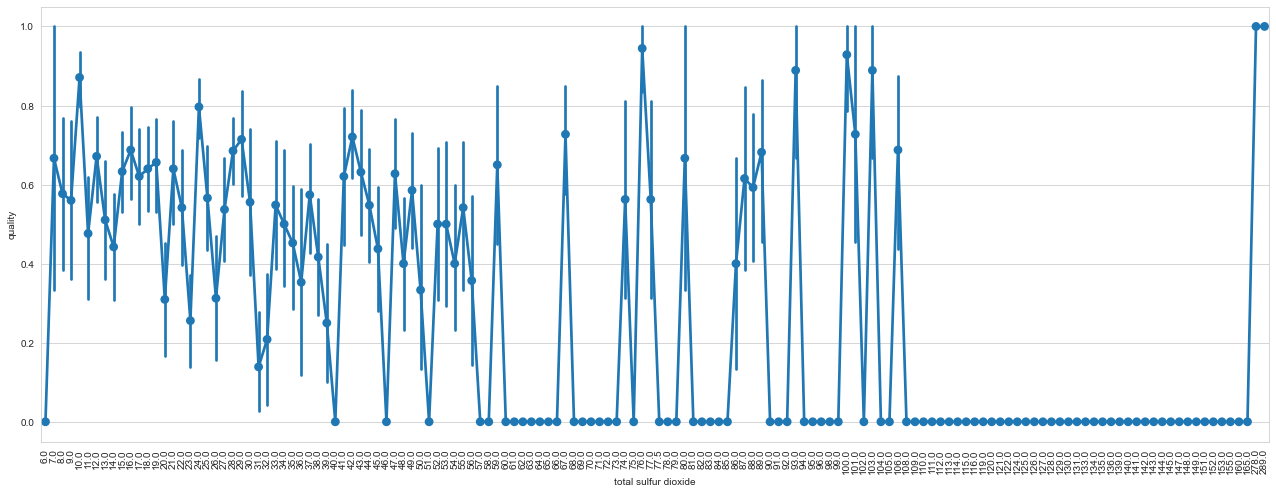

In [38]:
plt.figure(figsize=[22,8])
sns.pointplot(data=df,x='total sulfur dioxide',y="quality")
plt.xticks(rotation = 90)
plt.show()

# density vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

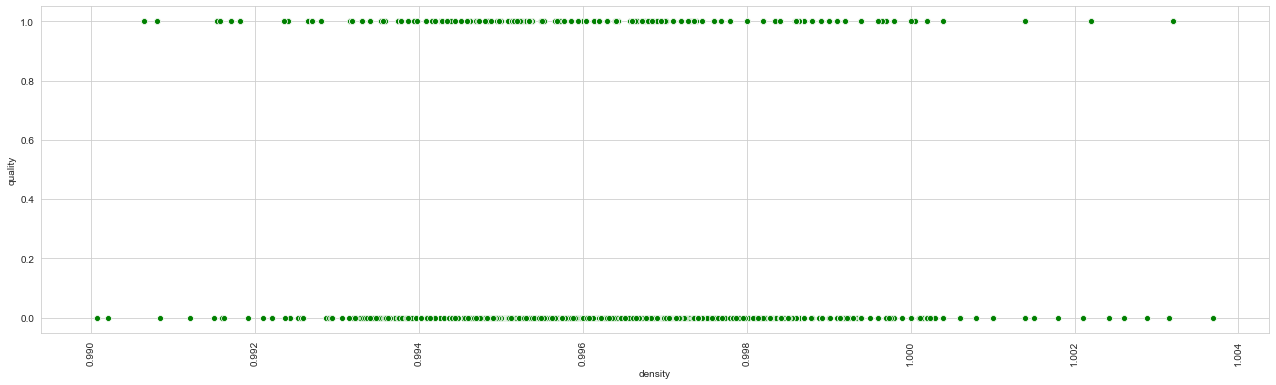

In [39]:
plt.figure(figsize=[22,6])
sns.scatterplot(x='density',y="quality",data=df,markers='o',color='g')
plt.xticks(rotation = 90)
plt.show()

# pH vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

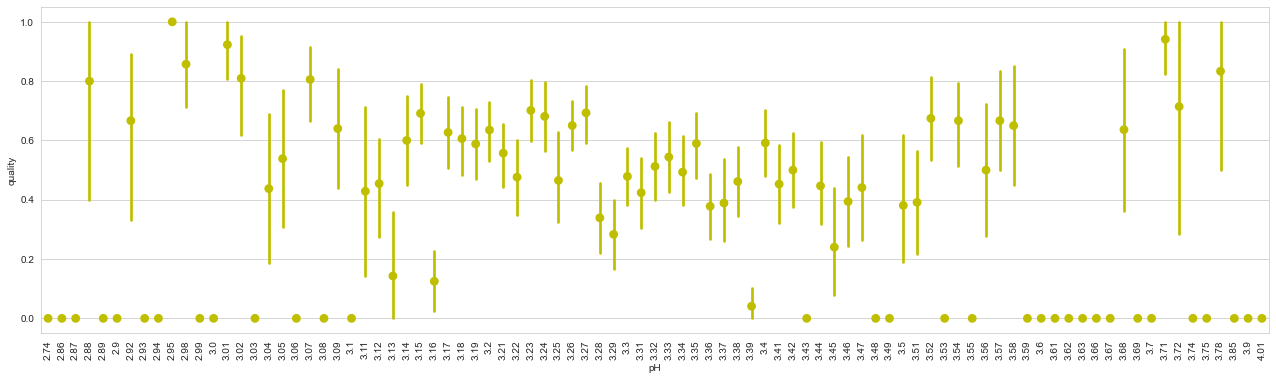

In [40]:
plt.figure(figsize=[22,6])
sns.pointplot(x='pH',y="quality",data=df,join=False,color='y',markers='o')
plt.xticks(rotation = 90)
plt.show()


# sulphates vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

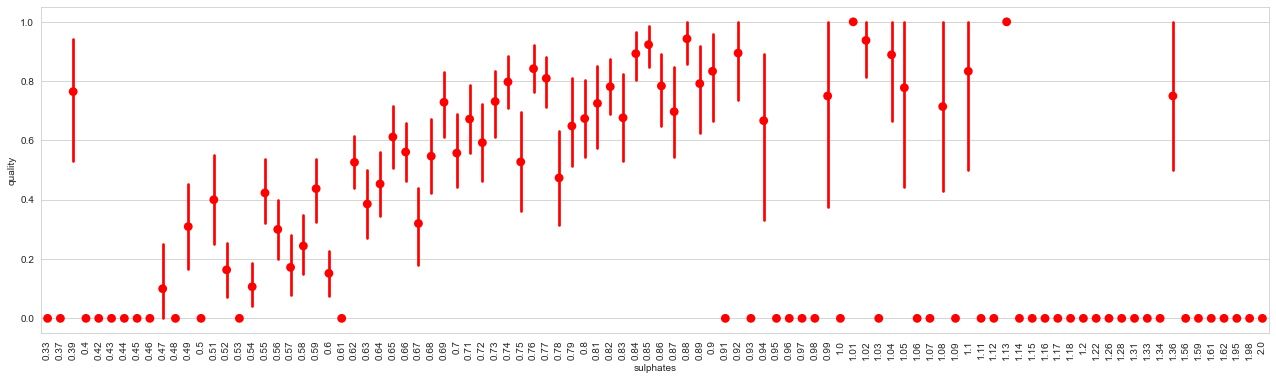

In [41]:
plt.figure(figsize=[22,6])
sns.pointplot(x='sulphates',y="quality",data=df,join=False,color='r')
plt.xticks(rotation = 90)
plt.show()

# alcohol vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

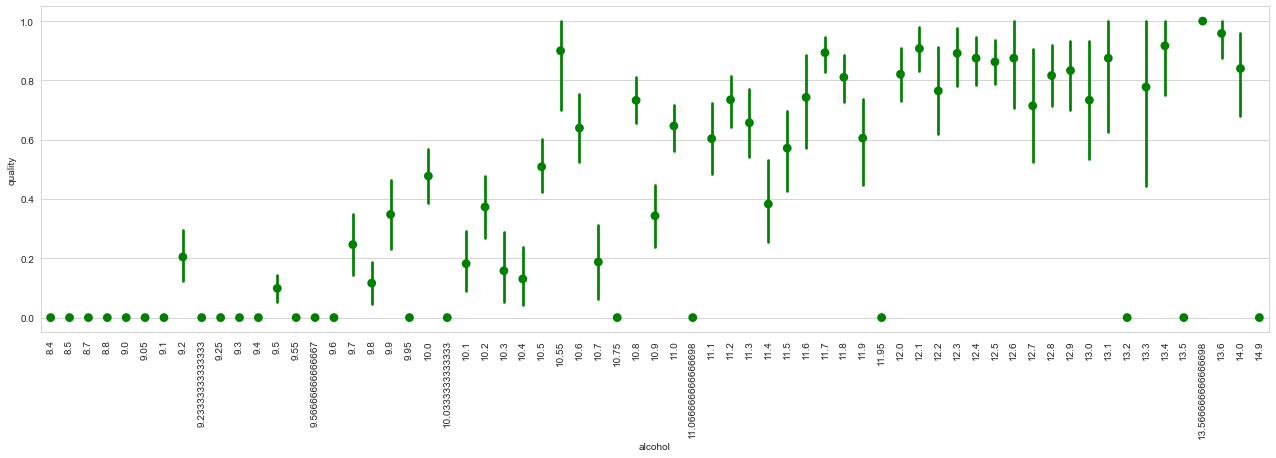

In [42]:
plt.figure(figsize=[22,6])
sns.pointplot(x='alcohol',y="quality",data=df,join=False,color='g')
plt.xticks(rotation = 90)
plt.show()

# multiVariant Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'fixed acidity wise Quality')

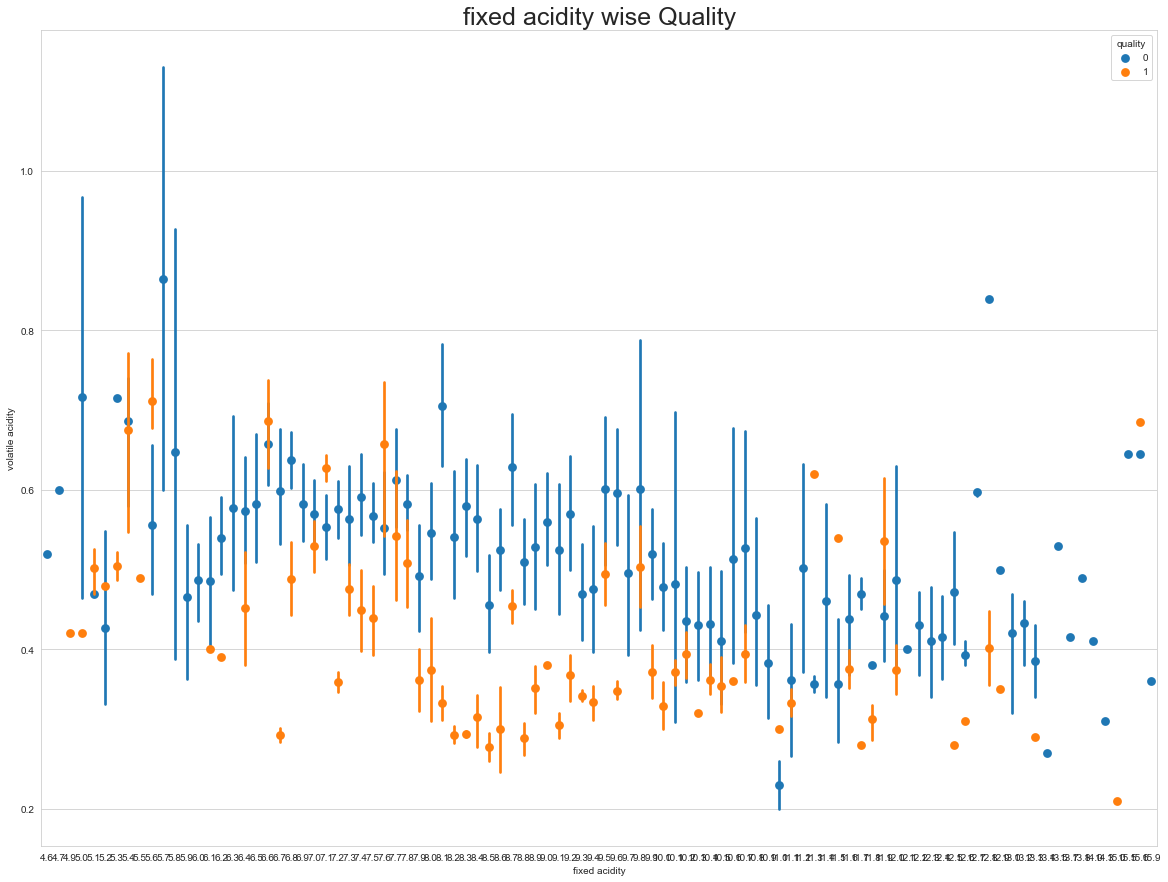

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=[20,15])
sns.pointplot(x='fixed acidity',y='volatile acidity',data=df,hue='quality', join=False)
plt.title('fixed acidity wise Quality',{"fontsize":25})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'citric acid wise Quality')

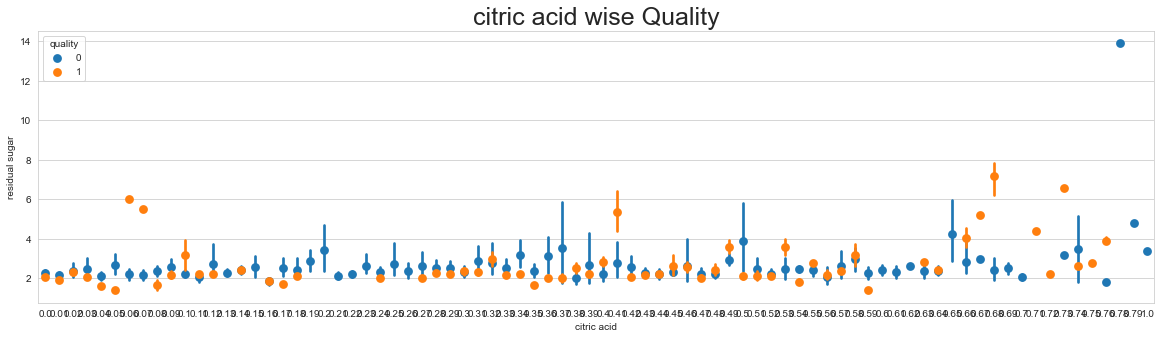

In [44]:
plt.figure(figsize=[20,5])
sns.pointplot(x='citric acid',y='residual sugar',data=df,hue='quality', join=False)
plt.title('citric acid wise Quality',{"fontsize":25})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152]),
 <a list of 153 Text major ticklabel objects>)

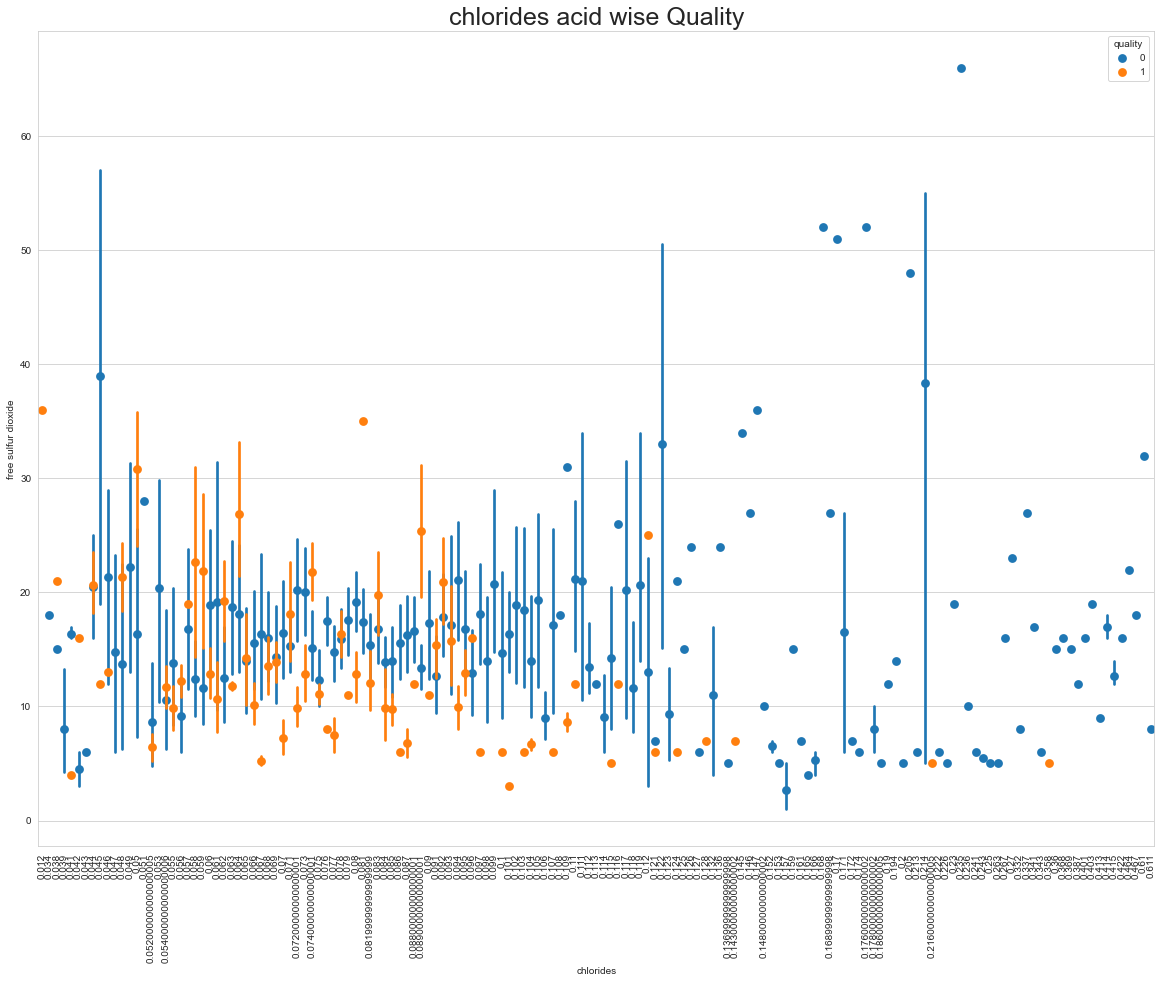

In [45]:
plt.figure(figsize=[20,15])
sns.pointplot(x='chlorides',y='free sulfur dioxide',data=df,hue='quality', join=False)
plt.title('chlorides acid wise Quality',{"fontsize":25})
plt.xticks(rotation = 90)

In [46]:
px.scatter(df, x='fixed acidity', y="quality", animation_frame='pH', 
           animation_group='alcohol',
        color="quality", hover_name='pH',
           )

<IPython.core.display.Javascript object>

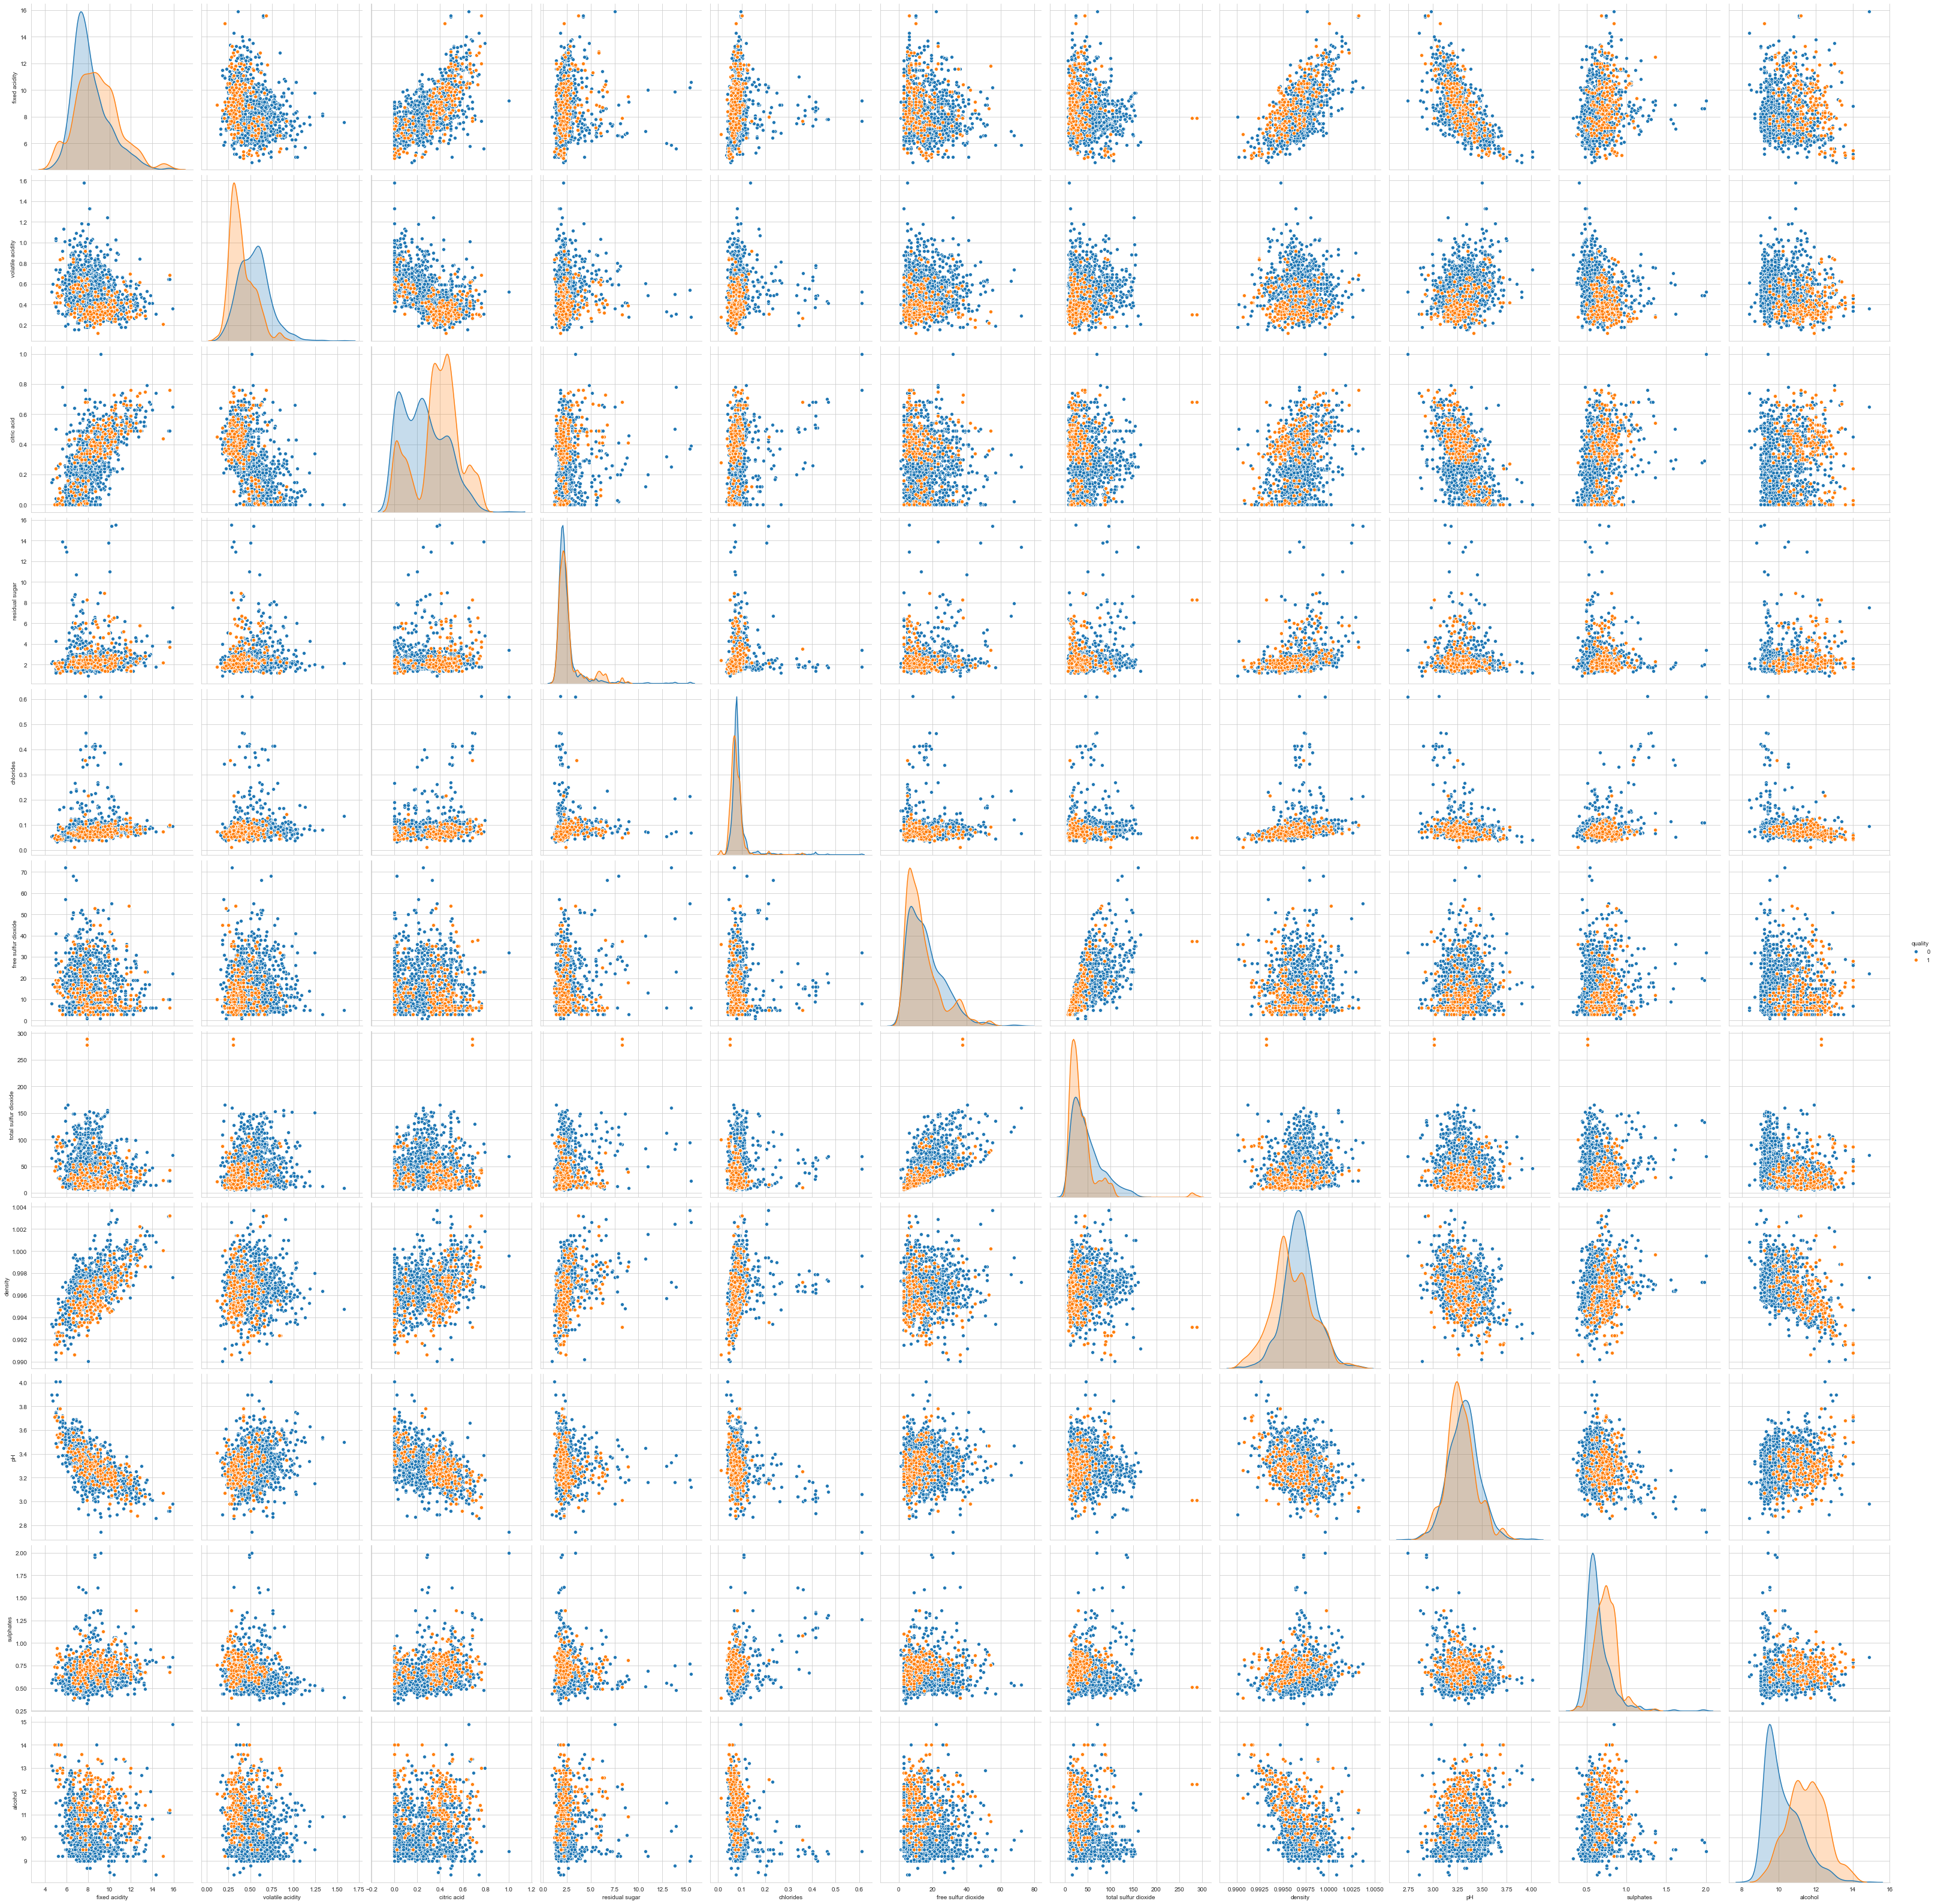

In [47]:
sns.pairplot(df,hue='quality',size=4)

# Removing the OULIERS

In [48]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df_final=df[(z<threshold).all(axis=1)]

<IPython.core.display.Javascript object>

In [49]:
print(df_final.shape,df.shape)

(2546, 12) (2764, 12)


In [50]:
loss=((len(df)-len(df_final))/len(df))*100
loss

7.88712011577424

# Skewness

In [51]:
df_final.skew()

fixed acidity           0.507592
volatile acidity        0.553381
citric acid             0.027407
residual sugar          2.268818
chlorides               0.982651
free sulfur dioxide     1.036233
total sulfur dioxide    1.314575
density                -0.067329
pH                      0.223540
sulphates               0.509417
alcohol                 0.371344
quality                -0.037735
dtype: float64

In [52]:
#Divede the input and output variable
df_x=df_final.drop("quality",axis=1)
y=df_final[["quality"]]

In [53]:
df_x.shape

(2546, 11)

In [54]:
y.shape

(2546, 1)

# handelling the skewness

In [55]:
for l in df_x.columns:
    if df_x[l].skew()>0.55:
        df_x[l]=np.log1p(df_x[l])
    if df_x[l].skew()<-0.55:
        df_x[l].np.log1p(df_x[l])
df_x.skew()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

fixed acidity           0.507592
volatile acidity        0.321360
citric acid             0.027407
residual sugar          1.532182
chlorides               0.841639
free sulfur dioxide    -0.027653
total sulfur dioxide    0.065075
density                -0.067329
pH                      0.223540
sulphates               0.509417
alcohol                 0.371344
dtype: float64

# Data Scaling

In [56]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler

In [57]:
#Scling the Data with Standard scaler
sc=StandardScaler()
df__x=sc.fit_transform(df_x)
X=pd.DataFrame(df__x,columns=df_x.columns)

<IPython.core.display.Javascript object>

In [58]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.622494          1.400290    -1.555821       -0.626110  -0.088695   
1      -0.397626          2.332860    -1.555821        0.266027   1.046063   
2      -0.397626          1.721689    -1.356132       -0.092983   0.738854   
3       1.513752         -1.229128     1.239817       -0.626110  -0.140825   
4      -0.622494          1.400290    -1.555821       -0.626110  -0.088695   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.137699              0.096709  0.713747  1.428763  -0.910950   
1             1.141748              1.115753  0.212334 -0.738116  -0.033571   
2             0.338347              0.790206  0.312617 -0.318720  -0.252916   
3             0.533250              0.949072  0.814030 -1.017714  -0.764720   
4            -0.137699              0.096709  0.713747  1.428763  -0.910950   

    alcohol  
0 -1.305992  
1 -0.961672  
2 -0.961672  
3 -0.961672  
4 -1.305992

In [59]:
y.value_counts()

quality
1          1297
0          1249
dtype: int64

# Principal Component Analysis (PCA)

In [60]:
from sklearn.decomposition import PCA
cover_matrix=PCA(n_components=len(X.columns))
cover_matrix.fit(X)

PCA(n_components=11)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

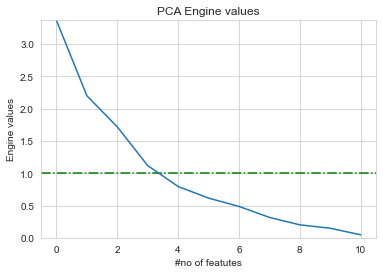

In [61]:
plt.ylabel("Engine values")
plt.xlabel("#no of featutes")
plt.title("PCA Engine values")
plt.ylim(0,max(cover_matrix.explained_variance_))
plt.axhline(y=1,color='g',linestyle='-.')
plt.plot(cover_matrix.explained_variance_)
plt.show()

In [62]:
pc=PCA(n_components=4)
x1=pc.fit_transform(X)
x=pd.DataFrame(x1)

<IPython.core.display.Javascript object>

# Model Creation

In [63]:

#In this data set we know that out target variable Quality is catagorical so we are going to take Logistic regresson
#lets make a function for getting the best random_satae for a model toget better accuracy score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split
f_acc=[]
f_rstate=[]
rgr_n=[]
def max_acc(rgr,x,y):
    max_acc=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20,stratify=y)
        rgr.fit(x_train,y_train)
        y_prd=rgr.predict(x_test)
        rc=accuracy_score(y_test,y_prd)
        print("Accuracy score ",rc,"coresponding to ",r)
        if rc>max_acc:
            max_acc=rc
            final_r=r
    f_acc.append(max_acc)
    f_rstate.append(final_r)
    rgr_n.append(input(""))
    print("max accuracy_ score coressponding to ♣♣→",final_r,"is♣♣",max_acc*100)

In [64]:
#lets make a function for cross_val_score
from sklearn.model_selection import cross_val_score  
cvss=[]
def k(model,x,y):
    c=cross_val_score(model,x,y,cv=5,scoring="accuracy")
    print("mean accuracy score for ",model,c.mean())
    print("Standard deviation  in accuracy score for ",model,c.std())
    print()
    print("******************************************************")
    print("After seen the cross validation score of",model,"the accuracy score mean is",c.mean())
    cvss.append(c.mean())

In [65]:
Roc_Auc=[]
def PLT(md,x,y,rd):#md=model ,x=indipendent variable,y=label,rd=random_state which one give the best accuracy 
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20,stratify=y)
    md.fit(x_train,y_train)
    pre=md.predict(x_test)
    acc=accuracy_score(y_test,pre)
    print(acc)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    Roc_Auc.append(roc_auc)
    print ('roc_auc_score = ',roc_auc)
    cm=confusion_matrix(y_test,pre)
    print(cm)
    sns.heatmap(cm,annot=True,cmap='rainbow',cbar=False)
    print()
    cr=classification_report(y_test,pre)
    print()
    print()
    print()
    plt.figure(figsize=[20,50],facecolor='purple')
    plt.subplot(912)
    plt.title(md,{"fontsize":22})
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print(cr,"\n","☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼")

In [66]:
trn_scr=[]
def train_loss(rgr,x,y,rd):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20,stratify=y)
    rgr.fit(x_train,y_train)
    scr=rgr.score(x_train,y_train)
    trn_loss=1-scr
    trn_scr.append(trn_loss)
    print(trn_loss)

# LogisticRegression

In [67]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_acc(lg,x,y)

Accuracy score  0.792156862745098 coresponding to  42
Accuracy score  0.788235294117647 coresponding to  43
Accuracy score  0.8 coresponding to  44
Accuracy score  0.807843137254902 coresponding to  45
Accuracy score  0.8235294117647058 coresponding to  46
Accuracy score  0.792156862745098 coresponding to  47
Accuracy score  0.8 coresponding to  48
Accuracy score  0.7980392156862746 coresponding to  49
Accuracy score  0.7980392156862746 coresponding to  50
Accuracy score  0.8058823529411765 coresponding to  51
Accuracy score  0.7843137254901961 coresponding to  52
Accuracy score  0.7980392156862746 coresponding to  53
Accuracy score  0.8019607843137255 coresponding to  54
Accuracy score  0.7980392156862746 coresponding to  55
Accuracy score  0.7764705882352941 coresponding to  56
Accuracy score  0.7980392156862746 coresponding to  57
Accuracy score  0.8215686274509804 coresponding to  58
Accuracy score  0.788235294117647 coresponding to  59
Accuracy score  0.8176470588235294 corespondi

In [68]:
#lets  check cross_val_score of the model
k(lg,x,y)

mean accuracy score for  LogisticRegression() 0.786306098077738
Standard deviation  in accuracy score for  LogisticRegression() 0.05642710761981001

******************************************************
After seen the cross validation score of LogisticRegression() the accuracy score mean is 0.786306098077738


0.8352941176470589
roc_auc_score =  0.8352307692307692
[[208  42]
 [ 42 218]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

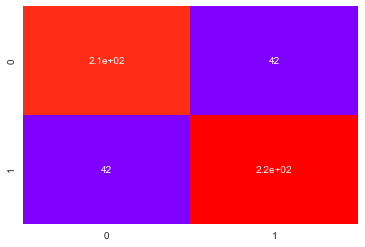

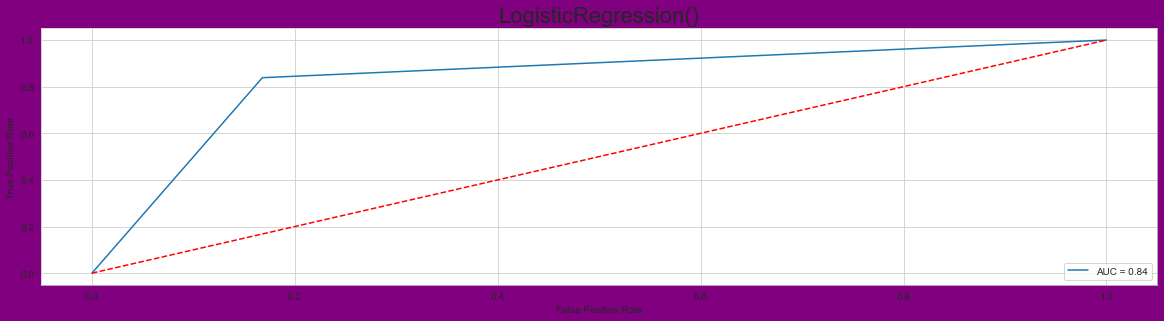

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       250
           1       0.84      0.84      0.84       260

    accuracy                           0.84       510
   macro avg       0.84      0.84      0.84       510
weighted avg       0.84      0.84      0.84       510
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [69]:
PLT(lg,x,y,73 )

In [70]:
train_loss(lg,x,y,73)

0.21414538310412579


# KNeighborsClassifier

In [71]:
from sklearn.model_selection import *
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={"n_jobs":range(1,30,2),"n_neighbors":range(0,50,3)}
Gk=GridSearchCV(kn,parameters,cv=5,scoring="accuracy")
Gk.fit(x,y)
Gk.best_params_#finding the best hyperparameter with Gridsearchcv

{'n_jobs': 1, 'n_neighbors': 3}

In [72]:
knn=KNeighborsClassifier(n_jobs=1,n_neighbors=3)
max_acc(knn,x,y)

Accuracy score  0.9431372549019608 coresponding to  42
Accuracy score  0.9372549019607843 coresponding to  43
Accuracy score  0.9392156862745098 coresponding to  44
Accuracy score  0.9352941176470588 coresponding to  45
Accuracy score  0.9313725490196079 coresponding to  46
Accuracy score  0.9294117647058824 coresponding to  47
Accuracy score  0.9392156862745098 coresponding to  48
Accuracy score  0.9176470588235294 coresponding to  49
Accuracy score  0.9274509803921569 coresponding to  50
Accuracy score  0.9411764705882353 coresponding to  51
Accuracy score  0.9176470588235294 coresponding to  52
Accuracy score  0.9274509803921569 coresponding to  53
Accuracy score  0.9117647058823529 coresponding to  54
Accuracy score  0.9215686274509803 coresponding to  55
Accuracy score  0.9 coresponding to  56
Accuracy score  0.9156862745098039 coresponding to  57
Accuracy score  0.9294117647058824 coresponding to  58
Accuracy score  0.9254901960784314 coresponding to  59
Accuracy score  0.9411764

In [73]:
#lets  check cross_val_score of the model
k(knn,x,y)

mean accuracy score for  KNeighborsClassifier(n_jobs=1, n_neighbors=3) 0.896681690357872
Standard deviation  in accuracy score for  KNeighborsClassifier(n_jobs=1, n_neighbors=3) 0.04012770582730726

******************************************************
After seen the cross validation score of KNeighborsClassifier(n_jobs=1, n_neighbors=3) the accuracy score mean is 0.896681690357872


0.9529411764705882
roc_auc_score =  0.9520000000000001
[[226  24]
 [  0 260]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

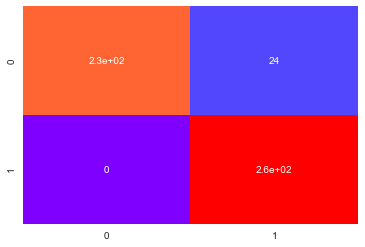

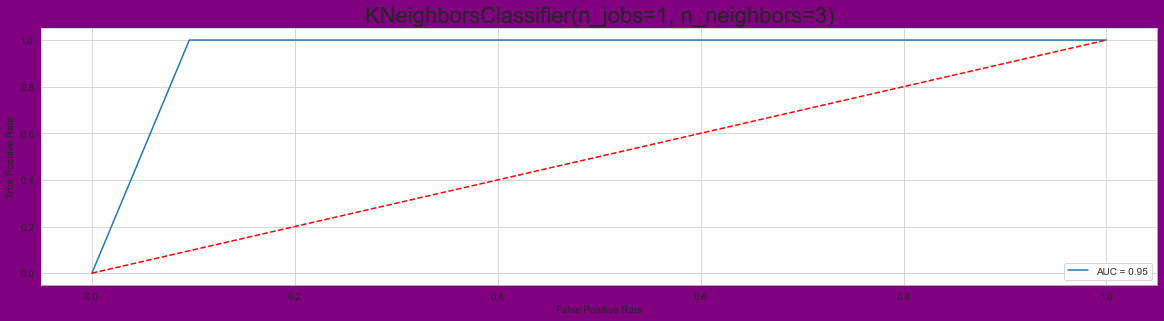

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       250
           1       0.92      1.00      0.96       260

    accuracy                           0.95       510
   macro avg       0.96      0.95      0.95       510
weighted avg       0.96      0.95      0.95       510
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [74]:
PLT(knn,x,y,89)

In [75]:
train_loss(knn,x,y,89)

0.03438113948919452


# DecisionTreeClassifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dc=DecisionTreeClassifier()
parameters={"criterion":["gini", "entropy"],"max_depth":range(2,10,1),"min_samples_leaf":range(1,10,2)}
grd=GridSearchCV(dc,parameters,cv=5,scoring="accuracy")
grd.fit(x,y)
grd.best_params_


{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1}

In [78]:
Dc=DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=1)
max_acc(Dc,x,y)

Accuracy score  0.9274509803921569 coresponding to  42
Accuracy score  0.9098039215686274 coresponding to  43
Accuracy score  0.9235294117647059 coresponding to  44
Accuracy score  0.9215686274509803 coresponding to  45
Accuracy score  0.9235294117647059 coresponding to  46
Accuracy score  0.9058823529411765 coresponding to  47
Accuracy score  0.9196078431372549 coresponding to  48
Accuracy score  0.9333333333333333 coresponding to  49
Accuracy score  0.9274509803921569 coresponding to  50
Accuracy score  0.9098039215686274 coresponding to  51
Accuracy score  0.8745098039215686 coresponding to  52
Accuracy score  0.9117647058823529 coresponding to  53
Accuracy score  0.9156862745098039 coresponding to  54
Accuracy score  0.9176470588235294 coresponding to  55
Accuracy score  0.9 coresponding to  56
Accuracy score  0.9176470588235294 coresponding to  57
Accuracy score  0.903921568627451 coresponding to  58
Accuracy score  0.9235294117647059 coresponding to  59
Accuracy score  0.91568627

In [79]:
#lets  check cross_val_score of the model
k(Dc,x,y)

mean accuracy score for  DecisionTreeClassifier(max_depth=9) 0.9021880657960631
Standard deviation  in accuracy score for  DecisionTreeClassifier(max_depth=9) 0.030623574964578865

******************************************************
After seen the cross validation score of DecisionTreeClassifier(max_depth=9) the accuracy score mean is 0.9021880657960631


0.9549019607843138
roc_auc_score =  0.9542307692307693
[[230  20]
 [  3 257]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

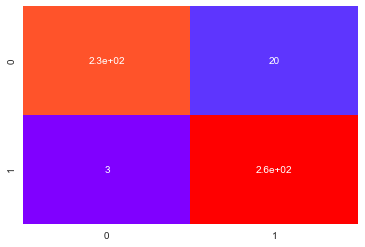

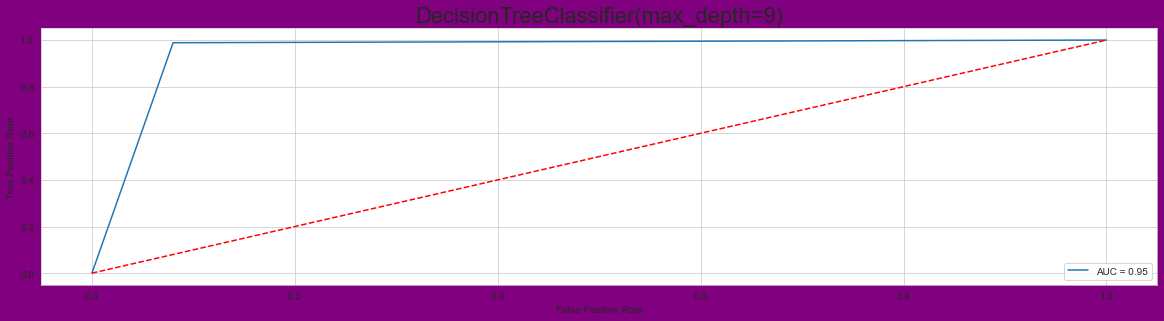

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       250
           1       0.93      0.99      0.96       260

    accuracy                           0.95       510
   macro avg       0.96      0.95      0.95       510
weighted avg       0.96      0.95      0.95       510
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [80]:
PLT(Dc,x,y,63)

In [81]:
train_loss(Dc,x,y,63)

0.03045186640471509


# RandomForestClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
Rdc=RandomForestClassifier()
parameters={"n_estimators":range(1,1000,200)}
grd_rdc=GridSearchCV(Rdc,parameters,cv=5,scoring='accuracy')
grd_rdc.fit(x,y)
grd_rdc.best_params_

{'n_estimators': 601}

In [84]:
rdclf=RandomForestClassifier(n_estimators=601)
max_acc(rdclf,x,y)

Accuracy score  0.9745098039215686 coresponding to  42
Accuracy score  0.9745098039215686 coresponding to  43
Accuracy score  0.9686274509803922 coresponding to  44
Accuracy score  0.9725490196078431 coresponding to  45
Accuracy score  0.9627450980392157 coresponding to  46
Accuracy score  0.9666666666666667 coresponding to  47
Accuracy score  0.9588235294117647 coresponding to  48
Accuracy score  0.9568627450980393 coresponding to  49
Accuracy score  0.9666666666666667 coresponding to  50
Accuracy score  0.9627450980392157 coresponding to  51
Accuracy score  0.9607843137254902 coresponding to  52
Accuracy score  0.9705882352941176 coresponding to  53
Accuracy score  0.9705882352941176 coresponding to  54
Accuracy score  0.9568627450980393 coresponding to  55
Accuracy score  0.9568627450980393 coresponding to  56
Accuracy score  0.9549019607843138 coresponding to  57
Accuracy score  0.9686274509803922 coresponding to  58
Accuracy score  0.9627450980392157 coresponding to  59
Accuracy s

In [85]:
#lets  check cross_val_score of the model
k(rdclf,x,y)

mean accuracy score for  RandomForestClassifier(n_estimators=601) 0.9504996340382912
Standard deviation  in accuracy score for  RandomForestClassifier(n_estimators=601) 0.02749667181074869

******************************************************
After seen the cross validation score of RandomForestClassifier(n_estimators=601) the accuracy score mean is 0.9504996340382912


0.9823529411764705
roc_auc_score =  0.982
[[241   9]
 [  0 260]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

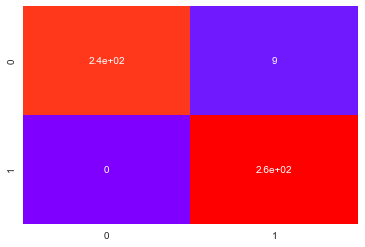

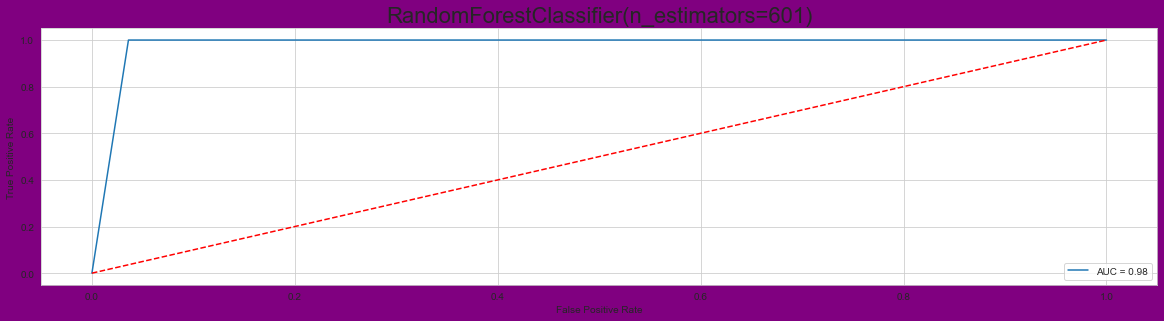

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       250
           1       0.97      1.00      0.98       260

    accuracy                           0.98       510
   macro avg       0.98      0.98      0.98       510
weighted avg       0.98      0.98      0.98       510
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [86]:
PLT(rdclf,x,y,89)

In [87]:
train_loss(rdclf,x,y,89)

0.0


# XGBClassifier

In [93]:
import xgboost

In [94]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
max_acc(xgb,x,y)

Accuracy score  0.9647058823529412 coresponding to  42
Accuracy score  0.9705882352941176 coresponding to  43
Accuracy score  0.9627450980392157 coresponding to  44
Accuracy score  0.9725490196078431 coresponding to  45
Accuracy score  0.9490196078431372 coresponding to  46
Accuracy score  0.9705882352941176 coresponding to  47
Accuracy score  0.9588235294117647 coresponding to  48
Accuracy score  0.9607843137254902 coresponding to  49
Accuracy score  0.9607843137254902 coresponding to  50
Accuracy score  0.9549019607843138 coresponding to  51
Accuracy score  0.9490196078431372 coresponding to  52
Accuracy score  0.9647058823529412 coresponding to  53
Accuracy score  0.9647058823529412 coresponding to  54
Accuracy score  0.9509803921568627 coresponding to  55
Accuracy score  0.9470588235294117 coresponding to  56
Accuracy score  0.9490196078431372 coresponding to  57
Accuracy score  0.9549019607843138 coresponding to  58
Accuracy score  0.9549019607843138 coresponding to  59
Accuracy s

In [95]:
#lets  check cross_val_score of the model
k(xgb,x,y)

mean accuracy score for  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 0.9406779922184985
Standard deviation  in accuracy score for  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, mon

0.9784313725490196
roc_auc_score =  0.978
[[239  11]
 [  0 260]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

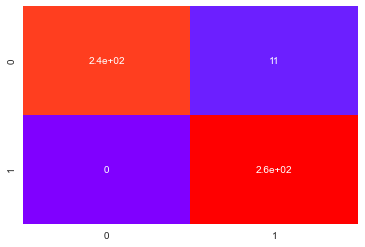

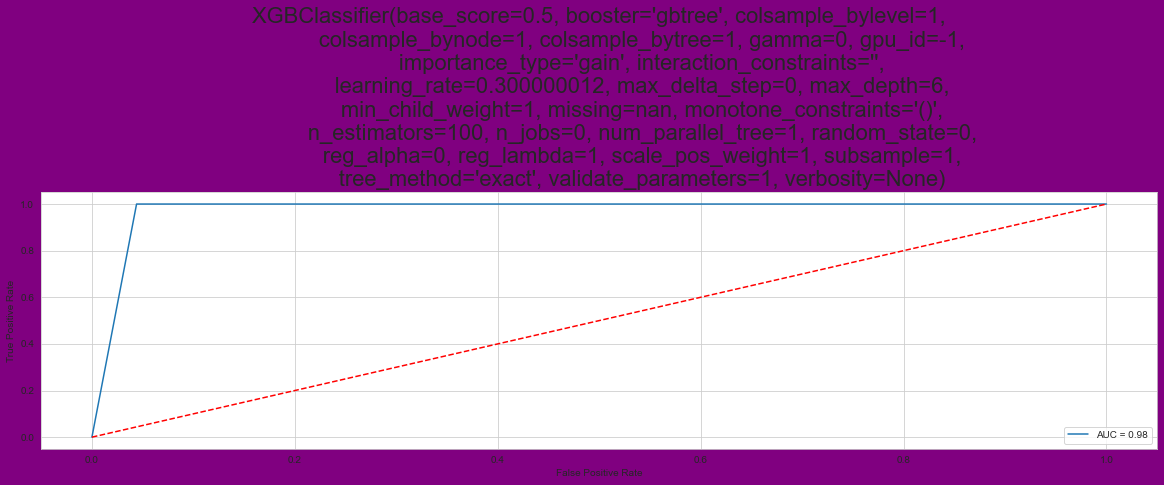

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       250
           1       0.96      1.00      0.98       260

    accuracy                           0.98       510
   macro avg       0.98      0.98      0.98       510
weighted avg       0.98      0.98      0.98       510
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [96]:
PLT(xgb,x,y,67)

In [97]:
train_loss(xgb,x,y,67)

0.0


In [99]:
Result=pd.DataFrame({"MODEL":rgr_n,"MOdel_Accuracy":f_acc,"Random_State":f_rstate,"CV_Score":cvss,
                    "AUC_ROC":Roc_Auc,"Train_Loss_Score":trn_scr})

<IPython.core.display.Javascript object>

In [100]:
Result

MODEL  MOdel_Accuracy  Random_State  CV_Score   AUC_ROC  \
0      LogisticRegression        0.835294            73  0.786306  0.835231   
1    KNeighborsClassifier        0.952941            89  0.896682  0.952000   
2  DecisionTreeClassifier        0.954902            63  0.902188  0.954231   
3  RandomForestClassifier        0.984314            89  0.950500  0.982000   
4           XGBClassifier        0.978431            67  0.940678  0.978000   

   Train_Loss_Score  
0          0.214145  
1          0.034381  
2          0.030452  
3          0.000000  
4          0.000000

In [101]:
Result.iplot()

In [104]:
#After seen above results am going with RandomForestClassifier its performing well in this dataset.
#with the random state of 89
rdclf=RandomForestClassifier(n_estimators=601)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=0.20,stratify=y)
rdclf.fit(x_train,y_train)
y_prd=rdclf.predict(x_test)
acc=accuracy_score(y_test,y_prd)
print("accuracy_score",acc*100)
print()
print()
print("CONFUSION_MATRIX OF GradientBoostingClassifier  →","\n",confusion_matrix(y_test,y_prd))
print()
print("classification_reportOF GradientBoostingClassifierr"  ,"\n",
      classification_report(y_test,y_prd))

accuracy_score 98.23529411764706


CONFUSION_MATRIX OF GradientBoostingClassifier  → 
 [[241   9]
 [  0 260]]

classification_reportOF GradientBoostingClassifierr 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       250
           1       0.97      1.00      0.98       260

    accuracy                           0.98       510
   macro avg       0.98      0.98      0.98       510
weighted avg       0.98      0.98      0.98       510



In [105]:
#saving the Model
import joblib #importing the job
  
# Save the model as a pickle in a file 
joblib.dump(rdclf,'wine_quality.pkl')

['wine_quality.pkl']

In [106]:
#saving the predict as csv
joblib.dump(rdclf,'wine_quality.csv')

['wine_quality.csv']

In [108]:
#lets call the model and predict it
Model=joblib.load('wine_quality.csv')
Model.predict(x_test)

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,